In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

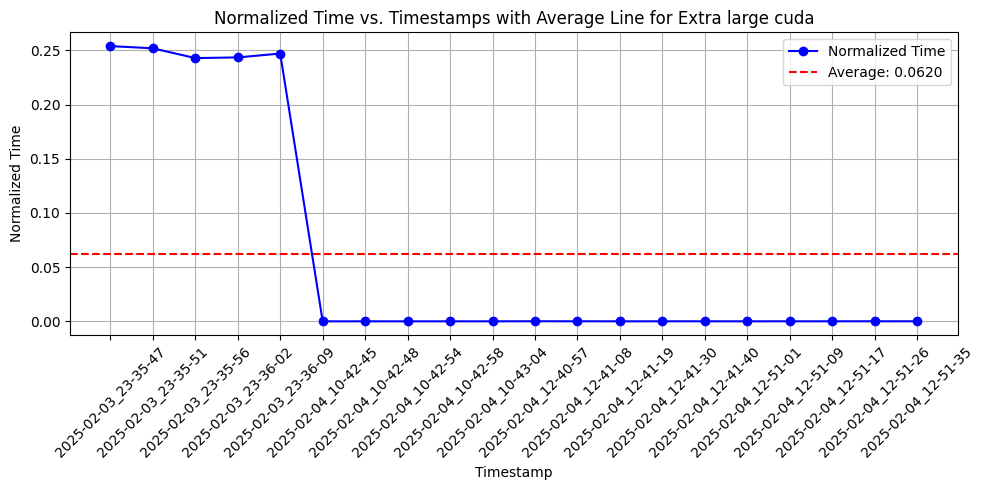

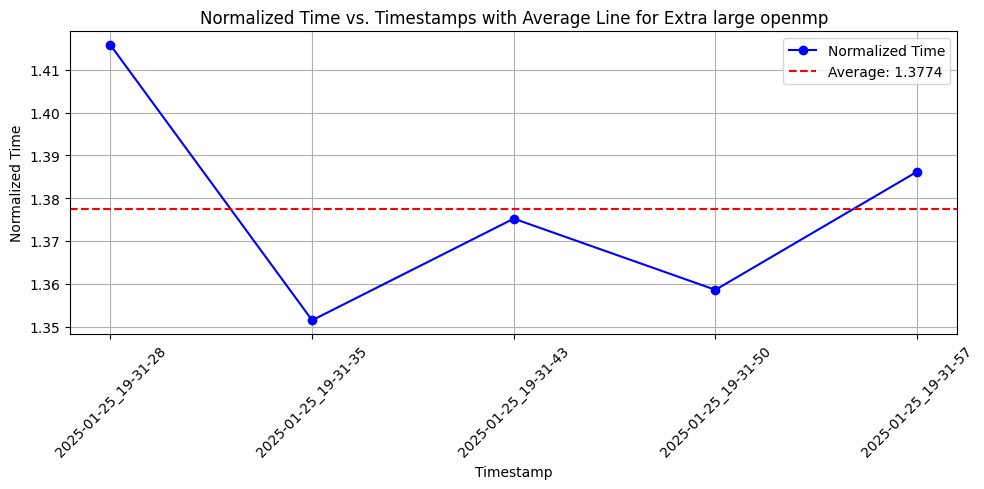

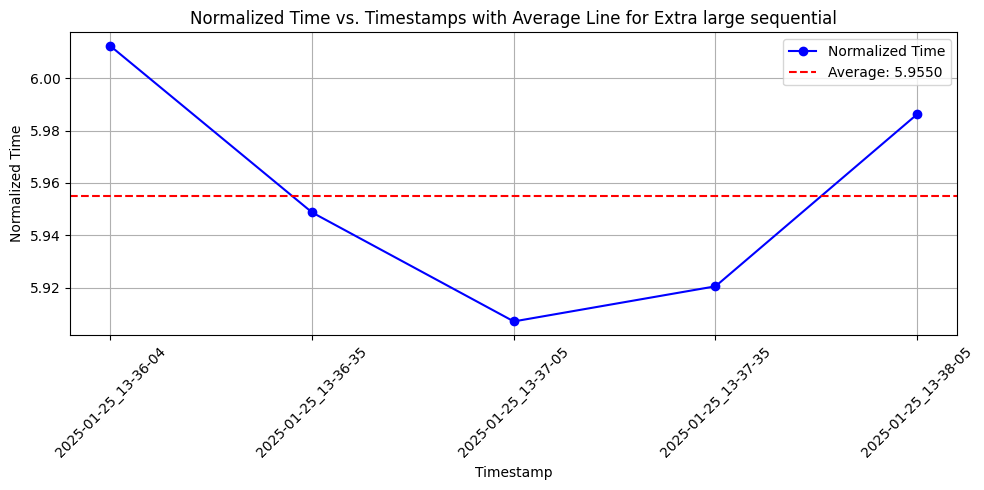

In [4]:
# List of files to compare
size = "extra_large"
files = [
    f"./cuda/{size}_cuda.json",
    f"./openmp/{size}_openmp.json",
    f"./sequential/{size}_sequential.json",
]


# load the data and calculate the average
def load_data_and_create_plot(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    # extract timestamps and normalized times
    timestamps = [list(item.keys())[0].split('=')[1] for item in data]
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)

    # create plot
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, normalized_times, marker='o', linestyle='-', color='b', label="Normalized Time")
    plt.axhline(y=avg_normalized_time, color='r', linestyle='--', label=f"Average: {avg_normalized_time:.4f}")
    plt.xticks(rotation=45)
    plt.title(
        f"Normalized Time vs. Timestamps with Average Line for {os.path.basename(filename).split('.')[0].replace('_', ' ').capitalize()}")
    plt.xlabel("Timestamp")
    plt.ylabel("Normalized Time")
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()

    # show the plot
    plt.show()
    plt.close()


# loop through each file and create the plot
for file in files:
    load_data_and_create_plot(file)


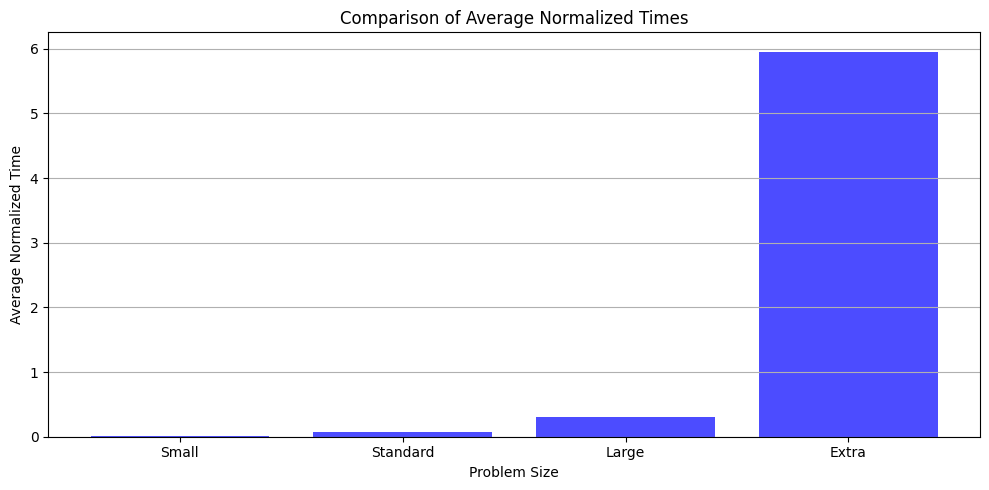

In [5]:
# load the data from a file and calculate the average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# list of files to compare
type_run = "sequential"
files = [
    f"./{type_run}/small_{type_run}.json",
    f"./{type_run}/standard_{type_run}.json",
    f"./{type_run}/large_{type_run}.json",
    f"./{type_run}/extra_large_{type_run}.json",
]

# extract averages and filenames
averages = []
file_names = []

for file in files:
    avg = load_data_and_calculate_avg(file)
    averages.append(avg)
    file_names.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize())  # get just the file name

# create the plot
plt.figure(figsize=(10, 5))
plt.bar(file_names, averages, color='b', alpha=0.7)
plt.xlabel("Problem Size")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times")
plt.grid(True, axis='y')

# show the plot
plt.tight_layout()
plt.show()


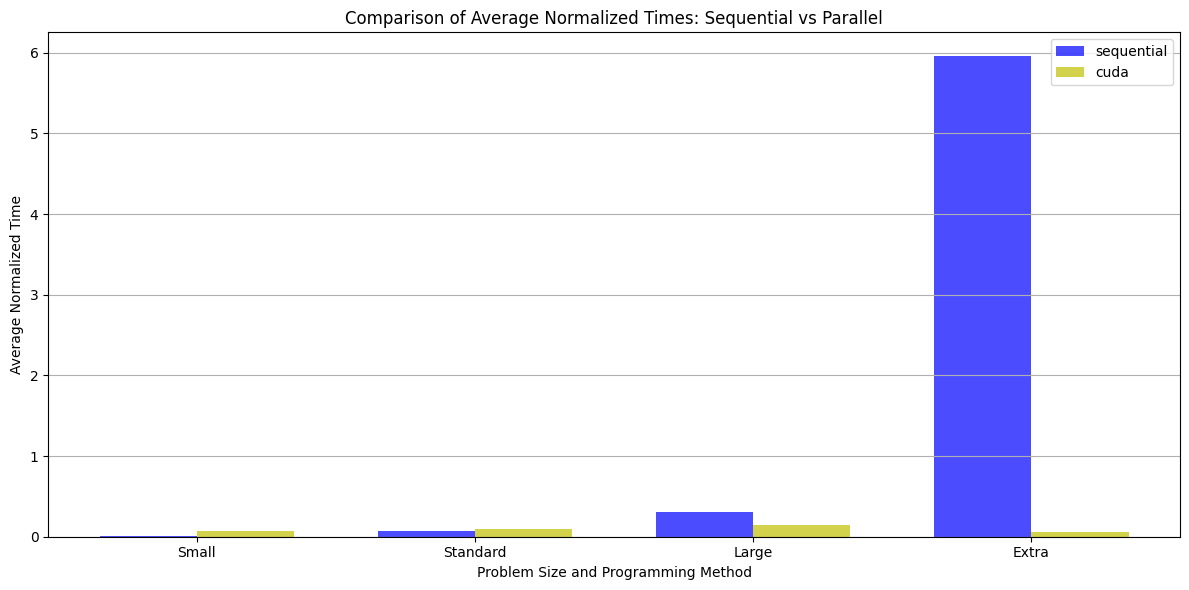

In [6]:
# function to load data and calculate average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# list 1 of files (e.g. sequential)
file_1_type = "sequential"
files_list_1 = [
    f"./{file_1_type}/small_{file_1_type}.json",
    f"./{file_1_type}/standard_{file_1_type}.json",
    f"./{file_1_type}/large_{file_1_type}.json",
    f"./{file_1_type}/extra_large_{file_1_type}.json",
]

# list 2 of files (e.g openmp)
file_2_type = "cuda"
files_list_2 = [
    f"./{file_2_type}/small_{file_2_type}.json",
    f"./{file_2_type}/standard_{file_2_type}.json",
    f"./{file_2_type}/large_{file_2_type}.json",
    f"./{file_2_type}/extra_large_{file_2_type}.json",
]

# ensure both lists have the same number of files
assert len(files_list_1) == len(files_list_2), "Both lists must have the same number of files!"

# extract averages and filenames 
averages_1 = []
for file in files_list_1:
    avg = load_data_and_calculate_avg(file)
    averages_1.append(avg)

# extract averages and filenames
averages_2 = []
sizes = []
for file in files_list_2:
    avg = load_data_and_calculate_avg(file)
    averages_2.append(avg)

    sizes.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize())

# create the plot with bars for both lists (one in blue, the other in yellow)
x = np.arange(len(files_list_1))  # Set the x position for the bars
width = 0.35  # Bar width
plt.figure(figsize=(12, 6))

# plot for list 1
plt.bar(x - width / 2, averages_1, width, color='b', alpha=0.7, label='List 1')

# plot for list 2
plt.bar(x + width / 2, averages_2, width, color='y', alpha=0.7, label='List 2')

# labels and title
plt.xlabel("Problem Size and Programming Method")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times: Sequential vs Parallel")
plt.xticks(x, sizes)
plt.legend([file_1_type, file_2_type])

plt.grid(True, axis='y')
plt.tight_layout()

# show the plot
plt.show()

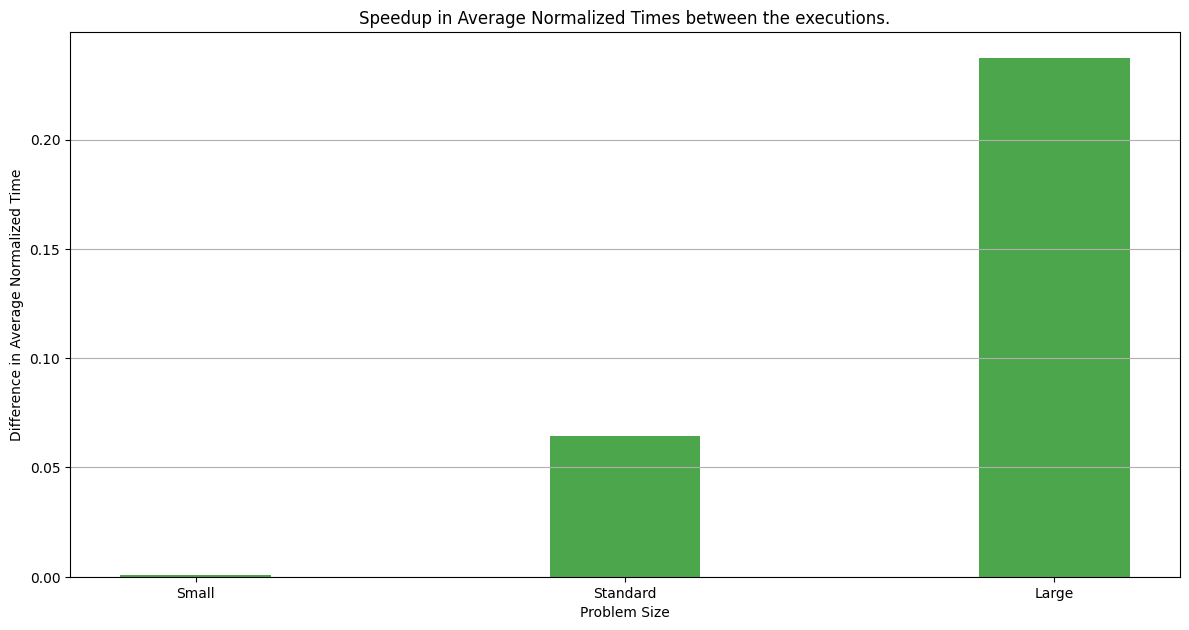

In [7]:
# function to load data and calculate average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # calculate the average normalized time
    avg_normalized_time = np.mean(normalized_times)
    return avg_normalized_time


# list 1 of files (e.g. sequential)
file_1_type = "sequential"
files_list_1 = [
    f"./{file_1_type}/small_{file_1_type}.json",
    f"./{file_1_type}/standard_{file_1_type}.json",
    f"./{file_1_type}/large_{file_1_type}.json",
]

# list 2 of files (e.g openmp)
file_2_type = "openmp"
files_list_2 = [
    f"./{file_2_type}/small_{file_2_type}.json",
    f"./{file_2_type}/standard_{file_2_type}.json",
    f"./{file_2_type}/large_{file_2_type}.json",
]

# ensure both lists have the same number of files
assert len(files_list_1) == len(files_list_2), "Both lists must have the same number of files!"

# extract averages for list 1
averages_1 = []
for file in files_list_1:
    avg = load_data_and_calculate_avg(file)
    averages_1.append(avg)

# extract averages for list 2
averages_2 = []
sizes = []
for file in files_list_2:
    avg = load_data_and_calculate_avg(file)
    averages_2.append(avg)
    sizes.append(os.path.basename(file).split('.')[0].split('_')[0].capitalize())

# calculate the difference between the two sets of averages (positive and negative)
differences = np.array(averages_1) - np.array(averages_2)

# create the plot with bars for both lists (one in blue, the other in yellow)
x = np.arange(len(files_list_1))  # Set the x position for the bars
width = 0.35  # Bar width
plt.figure(figsize=(12, 12))

# plot for the differences between the two sets (positive and negative)
plt.subplot(2, 1, 2)  # Create the second subplot for the difference
# color differences: red for negative, green for positive
colors = ['r' if diff < 0 else 'g' for diff in differences]
plt.bar(x, differences, width, color=colors, alpha=0.7, label='Difference')
plt.xlabel("Problem Size")
plt.ylabel("Difference in Average Normalized Time")
plt.title("Speedup in Average Normalized Times between the executions.")
plt.xticks(x, sizes)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


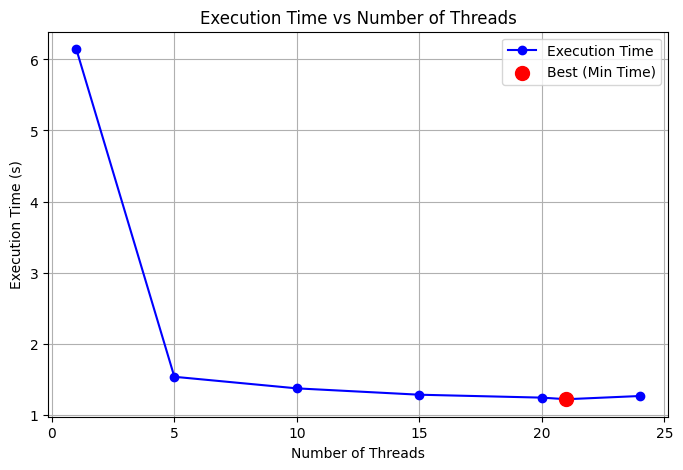

In [9]:
# data
num_threads = [1, 5, 10, 15, 20, 21, 24]
time = [6.143490, 1.534890, 1.371940, 1.282546, 1.241561, 1.219163, 1.264512]

# find the best (minimum) execution time
min_time = min(time)
best_index = time.index(min_time)
best_threads = num_threads[best_index]

# plot
plt.figure(figsize=(8, 5))
plt.plot(num_threads, time, marker='o', linestyle='-', color='b', label='Execution Time')

# highlight the best point
plt.scatter(best_threads, min_time, color='red', s=100, label='Best (Min Time)', zorder=3)

# labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Number of Threads')
plt.legend()
plt.grid(True)

# show plot
plt.show()

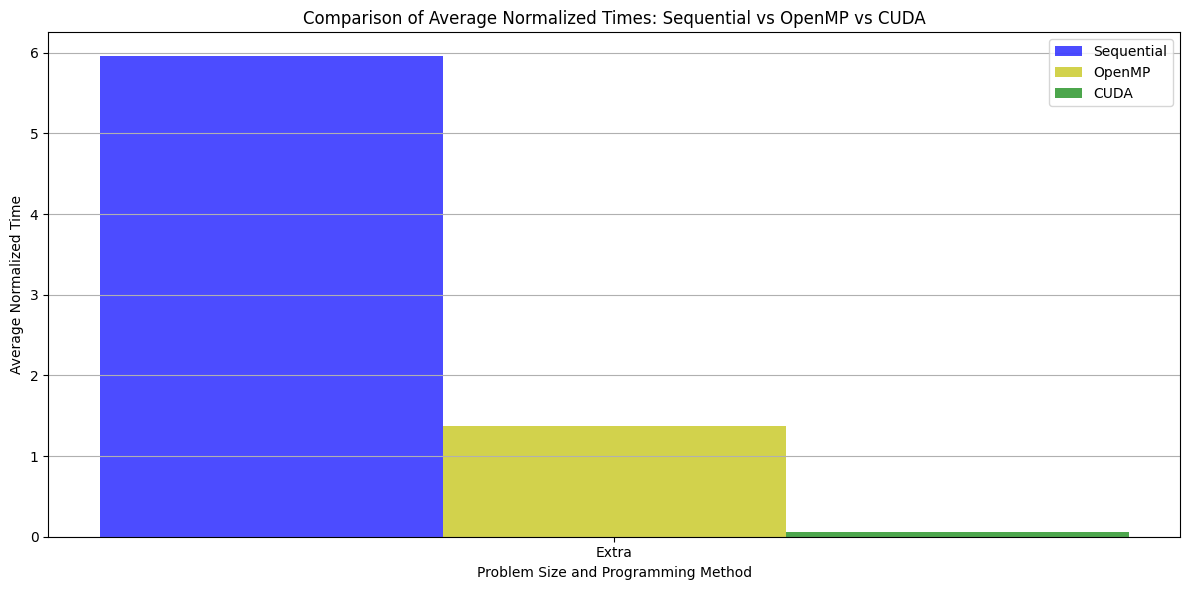

In [10]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt


# Function to load data and calculate average
def load_data_and_calculate_avg(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract normalized times
    normalized_times = [item[list(item.keys())[0]]['Normalized-time'] for item in data]

    # Calculate the average normalized time
    return np.mean(normalized_times)


# List 1 of files (e.g. Sequential)
files_list_1 = [
    "./sequential/extra_large_sequential.json",

]
# List 2 of files (e.g. OpenMP)
files_list_2 = [
    "./openmp/extra_large_openmp.json"
]
# List 3 of files (e.g. CUDA )
files_list_3 = [
    "./cuda/extra_large_cuda.json"
]

# Ensure all lists have the same number of files
assert len(files_list_1) == len(files_list_2) == len(files_list_3), "All lists must have the same number of files!"

# Extract averages
averages_1 = [load_data_and_calculate_avg(file) for file in files_list_1]
averages_2 = [load_data_and_calculate_avg(file) for file in files_list_2]
averages_3 = [load_data_and_calculate_avg(file) for file in files_list_3]

# Extract sizes for x-axis labels
sizes = [os.path.basename(file).split('.')[0].split('_')[0].capitalize() for file in files_list_1]

# Create the plot with bars for all three lists
x = np.arange(len(files_list_1))  # Set x position for the bars
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))

# Plot for list 1 (Sequential)
plt.bar(x - width, averages_1, width, color='b', alpha=0.7, label='Sequential')
# Plot for list 2 (OpenMP)
plt.bar(x, averages_2, width, color='y', alpha=0.7, label='OpenMP')
# Plot for list 3 (CUDA)
plt.bar(x + width, averages_3, width, color='g', alpha=0.7, label='CUDA')

# Labels and title
plt.xlabel("Problem Size and Programming Method")
plt.ylabel("Average Normalized Time")
plt.title("Comparison of Average Normalized Times: Sequential vs OpenMP vs CUDA")
plt.xticks(x, sizes)
plt.legend()

plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


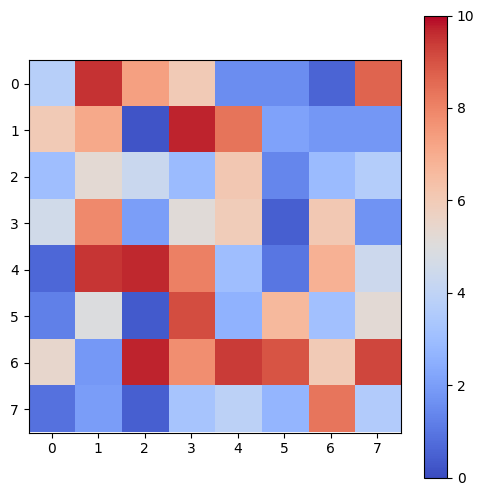

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define problem size
N = 8  # Matrix size
TSTEPS = 2  # Number of iterations

# Initialize matrix with random values for visualization
np.random.seed(42)
h_A = np.random.rand(N, N) * 10
h_B = np.zeros((N, N))


# Stencil computation function
def jacobi_iteration(h_A, h_B):
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            h_B[i, j] = 0.2 * (h_A[i, j] + h_A[i, j - 1] + h_A[i, j + 1] +
                               h_A[i - 1, j] + h_A[i + 1, j])


# Prepare figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(h_A, cmap="coolwarm", vmin=0, vmax=10)
fig.colorbar(cax)


def update(frame):
    global h_A, h_B
    jacobi_iteration(h_A, h_B)  # Perform one iteration
    h_A, h_B = h_B.copy(), h_A  # Swap matrices
    cax.set_data(h_A)
    ax.set_title(f"Iteration {frame + 1}")


ani = animation.FuncAnimation(fig, update, frames=TSTEPS, interval=1000)
plt.show()
